In [7]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)
df = df.replace('?', pd.np.NaN)
# Convert the columns to appropriate data types
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].astype(float)
df = df.dropna()

# Group the data by date and calculate the sum of the sub metering columns
df_grouped = df.groupby(['Date']).sum()[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

df_grouped

/var/folders/r2/mdj_r9dx6kb3dxhznzpyn76h0000gn/T/ipykernel_90385/529449599.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df = df.replace('?', pd.np.NaN)


,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,
1/1/2007,0.0,352.0,5880.0
1/1/2008,2461.0,2739.0,12355.0
1/1/2009,765.0,3845.0,2803.0
1/1/2010,2304.0,327.0,3558.0
1/10/2007,1507.0,6622.0,5960.0
...,...,...,...
9/8/2010,0.0,515.0,4042.0
9/9/2007,2184.0,4438.0,9233.0
9/9/2008,236.0,453.0,7728.0


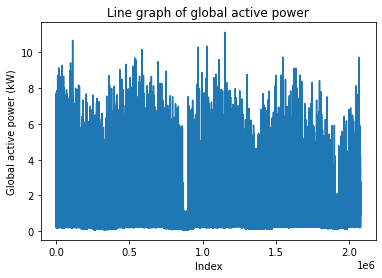

In [8]:
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Index')
plt.ylabel('Global active power (kW)')
plt.title('Line graph of global active power')
plt.show()

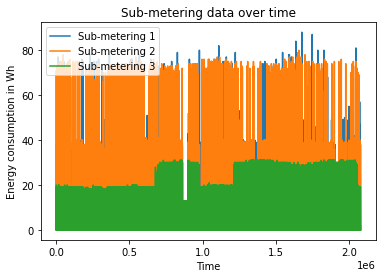

In [9]:
sub_metering_1 = df["Sub_metering_1"].astype(float)
sub_metering_2 = df["Sub_metering_2"].astype(float)
sub_metering_3 = df["Sub_metering_3"].astype(float)

plt.plot(sub_metering_1, label="Sub-metering 1")
plt.plot(sub_metering_2, label="Sub-metering 2")
plt.plot(sub_metering_3, label="Sub-metering 3")
plt.xlabel("Time")
plt.ylabel("Energy consumption in Wh")
plt.title("Sub-metering data over time")
plt.legend(loc="upper left")
plt.show()

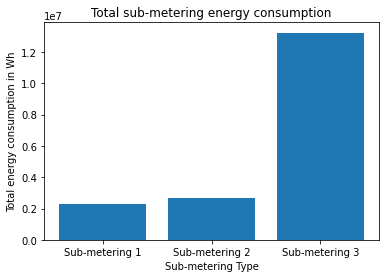

In [10]:
total_sub_metering_1 = sub_metering_1.sum()
total_sub_metering_2 = sub_metering_2.sum()
total_sub_metering_3 = sub_metering_3.sum()

plt.bar(["Sub-metering 1", "Sub-metering 2", "Sub-metering 3"], [total_sub_metering_1, total_sub_metering_2, total_sub_metering_3])

plt.xlabel("Sub-metering Type")
plt.ylabel("Total energy consumption in Wh")
plt.title("Total sub-metering energy consumption")
plt.show()

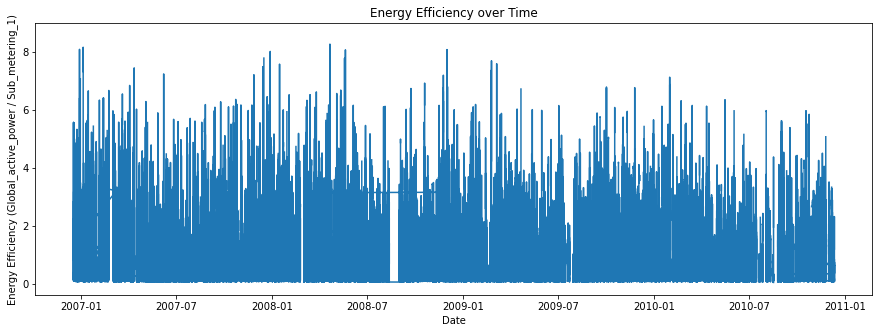

In [11]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('datetime')

# Calculate energy efficiency as Global_active_power / Sub_metering_1
df['efficiency'] = df['Global_active_power'] / df['Sub_metering_1']

# Plot the energy efficiency over time
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['efficiency'])
plt.xlabel('Date')
plt.ylabel('Energy Efficiency (Global_active_power / Sub_metering_1)')
plt.title('Energy Efficiency over Time')
plt.show()

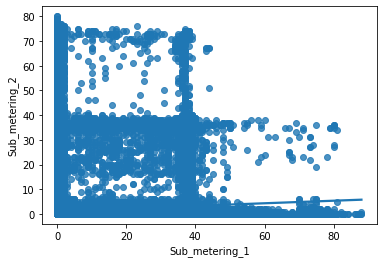

In [12]:
sns.regplot(x='Sub_metering_1', y='Sub_metering_2', data=df)
plt.show()

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
X = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Mean Squared Error:  0.31409400869800885


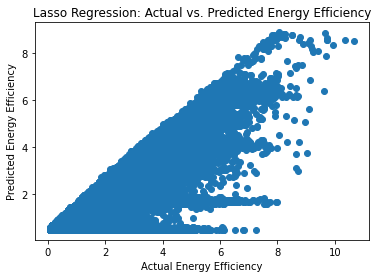

In [16]:
# Train a Lasso regression model on the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Efficiency")
plt.ylabel("Predicted Energy Efficiency")
plt.title("Lasso Regression: Actual vs. Predicted Energy Efficiency")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'score'

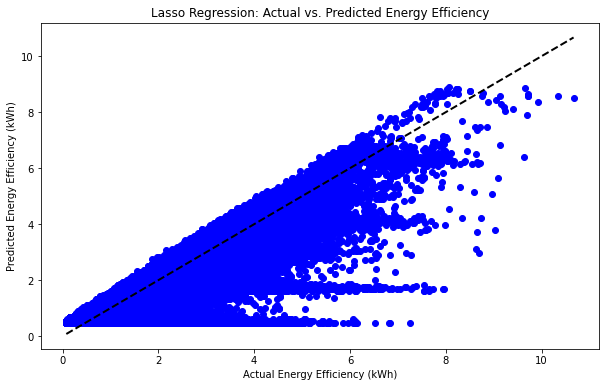

In [17]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Energy Efficiency (kWh)")
plt.ylabel("Predicted Energy Efficiency (kWh)")
plt.title("Lasso Regression: Actual vs. Predicted Energy Efficiency")
plt.show()

In [18]:
lasso.coef_

array([0.06742526, 0.06387863, 0.07001731])

In [19]:
lasso.intercept_

0.4809331912831878

In [20]:

"Equation: y = 0.06742526x_1 + 0.06387863x_2 + 0.07001731x_3 + 0.48. The significance of this is that submetering 3 electric water heater and air conditioner has higher impact than submetering 2 and 1"

'Equation: y = 0.06742526x_1 + 0.06387863x_2 + 0.07001731x_3 + 0.48. The significance of this is that submetering 3 electric water heater and air conditioner has higher impact than submetering 2 and 1'